In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '120-years-of-olympic-history-athletes-and-results:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F31029%2F40943%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T160025Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db19dfac9fabbaeb84d00309b37100dfdc2b64d89dc48d3f7c45ecc7263e77f40225af8121ceca698a2d758d3018d1b9cd0947d1c2567144940888f4b828ad3f5193d67abb2ed629d2619675f1209c85953033974bf4de5f793aea623efd7f02f492f9838dca0242e3597fb2fbdd3743e6fb96cd69076c5db7e8aa26373e42db122695c2a8a42700ba2f5109d6cd859e55582cc5e80c152f9099393bc64e555c5a7622455df874f17e4b744db43b87b01ed93b556f06fbe7b1b45fdb36452adda7119ef222ce7cbf3d7df133ecb9424752b965260661158c9ed34111f976065de93216ec5fdb8bf707391d3a6467788d0086646113b451202704880123d48554c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/athlete_events.csv")

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df = pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [ ]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

mean_Height = df['Height'].mean()
df['Height'] = df['Height'].fillna(mean_Height)

mean_Weight = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_Weight)

print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [3]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
medal_counts = df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
print(medal_counts)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64


In [6]:
top_athletes = df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
print(top_athletes)

Name
Michael Fred Phelps, II                 28
Larysa Semenivna Latynina (Diriy-)      18
Nikolay Yefimovich Andrianov            15
Takashi Ono                             13
Borys Anfiyanovych Shakhlin             13
Ole Einar Bjrndalen                     13
Edoardo Mangiarotti                     13
Natalie Anne Coughlin (-Hall)           12
Sawao Kato                              12
Dara Grace Torres (-Hoffman, -Minas)    12
Name: Medal, dtype: int64


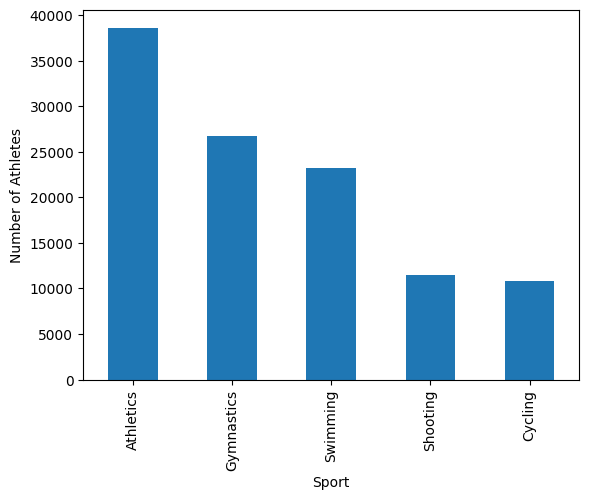

In [7]:
popular_sports = df['Sport'].value_counts().sort_values(ascending=False).head(5)
popular_sports.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.show()

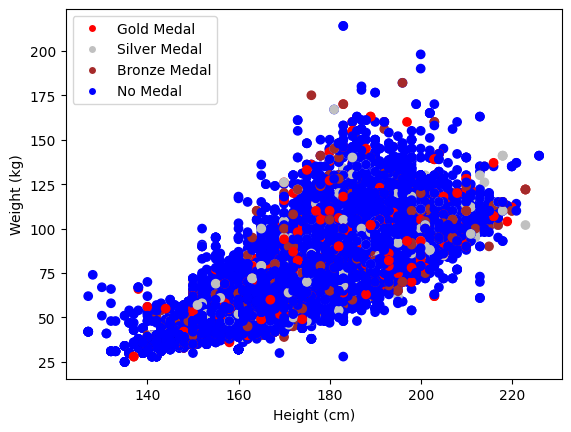

In [8]:
colors = {'Gold': 'red', 'Silver': 'silver', 'Bronze': 'brown', np.nan: 'blue'}
labels = {'Gold': 'Gold Medal', 'Silver': 'Silver Medal', 'Bronze': 'Bronze Medal', np.nan: 'No Medal'}

scatter_plot = plt.scatter(df['Height'], df['Weight'], c=df['Medal'].map(colors))

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=labels[key], markerfacecolor=colors[key]) for key in colors.keys()]
plt.legend(handles=legend_elements)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

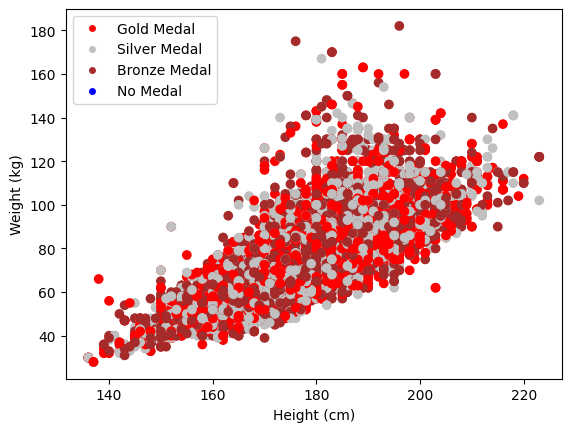

In [9]:
df_filtered = df.dropna(subset=['Medal'])
plt.scatter(df_filtered['Height'], df_filtered['Weight'], c=df_filtered['Medal'].map({'Gold': 'red', 'Silver': 'silver', 'Bronze': 'brown'}))
plt.legend(handles=legend_elements)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()